In [248]:
import numpy as np
import pandas as pd
from pathlib import Path

In [249]:
full_data = Path('../Resources/full_data.csv')
manufacturer_data = Path('../Resources/vaccinations-by-manufacturer.csv')

In [250]:
full_data = pd.read_csv(full_data)
manufacturer_data = pd.read_csv(manufacturer_data)

In [251]:
total_cases = full_data.drop(columns=['new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_deaths','biweekly_cases'])
total_cases = total_cases.dropna()
total_cases = total_cases.groupby(['location']).max('total_cases')
total_cases = total_cases.rename(columns={'total_cases':'Total Cases', 'total_deaths':'Total Deaths'})
total_cases = pd.DataFrame(total_cases)
drop_values = ['South America','World','High income','Asia','Europe','Upper middle income','European Union','North America','Lower middle income']
total_cases = total_cases.drop(index = drop_values)
top_cases = total_cases.nlargest(n=10,columns='Total Cases')
top_deaths = total_cases.nlargest(n=10,columns='Total Deaths')
total_cases

,Total Cases,Total Deaths
location,,
Afghanistan,233472.0,7985.0
Africa,13140629.0,259098.0
Albania,334863.0,3605.0
Algeria,272023.0,6881.0
American Samoa,8359.0,34.0
...,...,...
Vietnam,11624000.0,43206.0
Wallis and Futuna,3760.0,9.0
Yemen,11945.0,2159.0


In [252]:
manufacturer_data = manufacturer_data.groupby(['location','vaccine']).max('total_vaccinations')
manufacturer_data = manufacturer_data.groupby('location').sum('total_vaccinations')
manufacturer_data = manufacturer_data.rename(columns={'total_vaccinations':'Total Vaccinations'})
manufacturer_data = manufacturer_data.drop(index = 'European Union')
top_vax = manufacturer_data.nlargest(n=10,columns='Total Vaccinations')
low_vax = manufacturer_data.nsmallest(n=10,columns='Total Vaccinations')

In [253]:
vax_case_ratio = pd.merge(total_cases, manufacturer_data, how='inner', on='location')
vax_case_ratio['Vaccinations:Cases'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Cases']
vax_case_ratio['Vaccinations:Deaths'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Deaths']
top_vaxcase_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Cases')
top_vaxdeath_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Deaths')
vax_case_ratio.head()

,Total Cases,Total Deaths,Total Vaccinations,Vaccinations:Cases,Vaccinations:Deaths
location,,,,,
Argentina,10131173.0,130853.0,116978521,11.546395,893.968965
Austria,6082343.0,22534.0,20459016,3.363674,907.917636
Belgium,4861393.0,34339.0,29617119,6.092311,862.492181
Bulgaria,1329225.0,38700.0,4616938,3.473406,119.300724
Canada,4789387.0,54282.0,95155135,19.867915,1752.977691


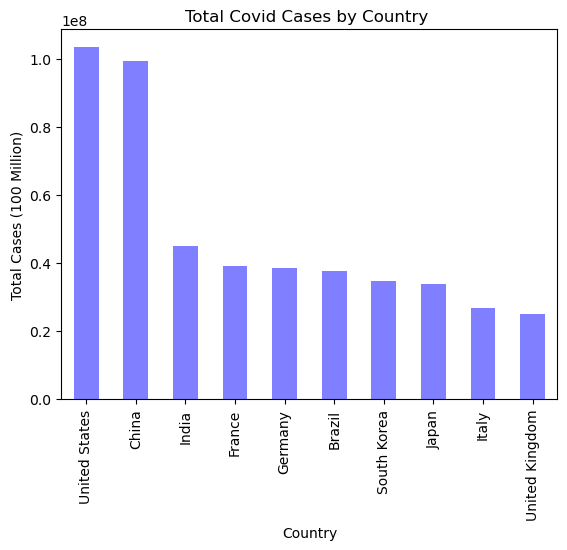

In [241]:
top_cases_chart = top_cases['Total Cases'].plot(kind='bar', color='blue', alpha=0.5, xlabel='Country', ylabel='Total Cases (100 Million)', title='Total Covid Cases by Country ')

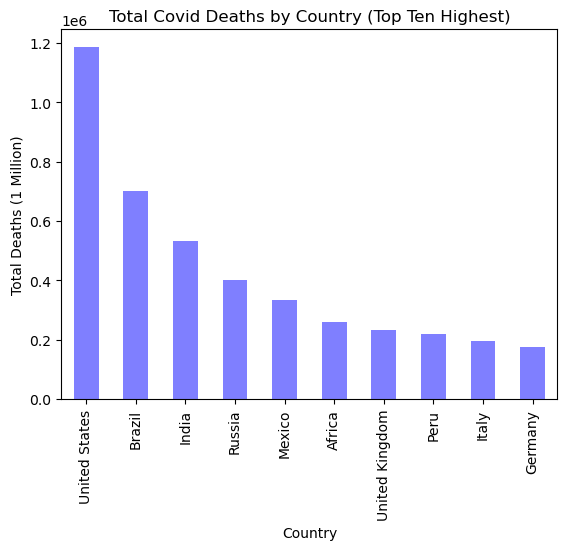

In [242]:
top_death_chart = top_deaths['Total Deaths'].plot(kind='bar', color='blue', alpha=0.5, xlabel='Country', ylabel='Total Deaths (1 Million)', title='Total Covid Deaths by Country (Top Ten Highest)')

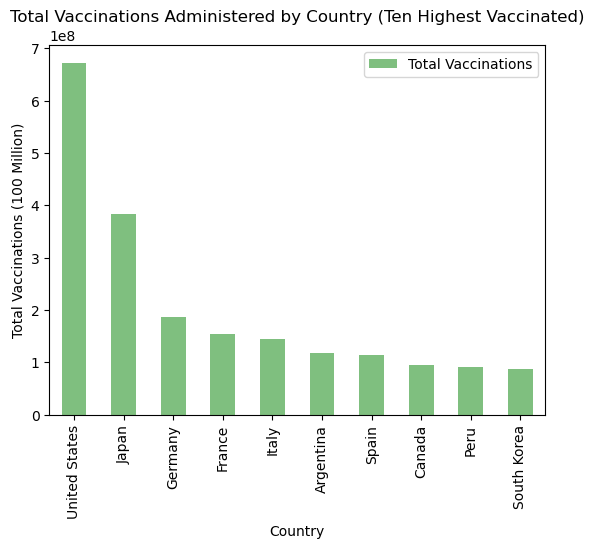

In [243]:
top_vax_chart = top_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (100 Million)', title='Total Vaccinations Administered by Country (Ten Highest Vaccinated)')

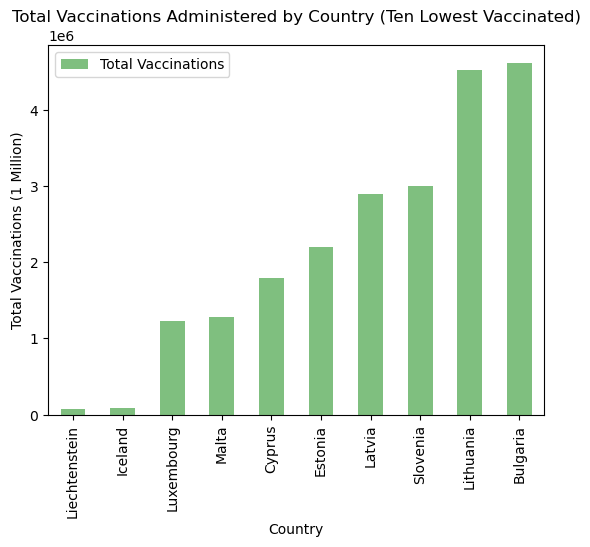

In [244]:
low_vax_chart = low_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (1 Million)', title='Total Vaccinations Administered by Country (Ten Lowest Vaccinated)')

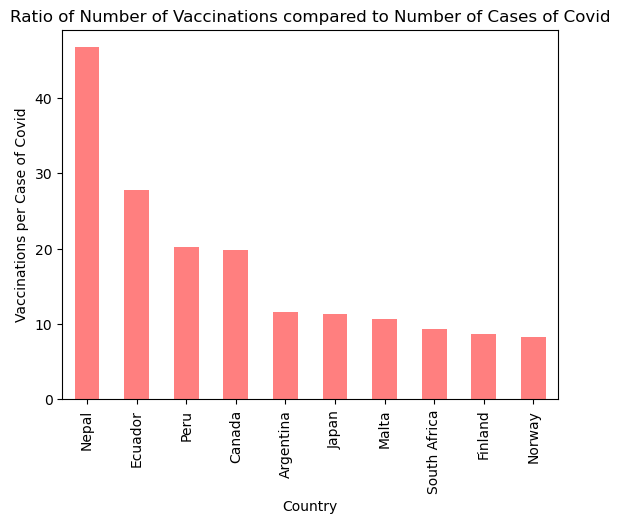

In [245]:
vax_case_plot = top_vaxcase_ratio['Vaccinations:Cases'].plot(kind='bar',title='Ratio of Number of Vaccinations compared to Number of Cases of Covid', xlabel='Country',ylabel='Vaccinations per Case of Covid', color='red',alpha=0.5)

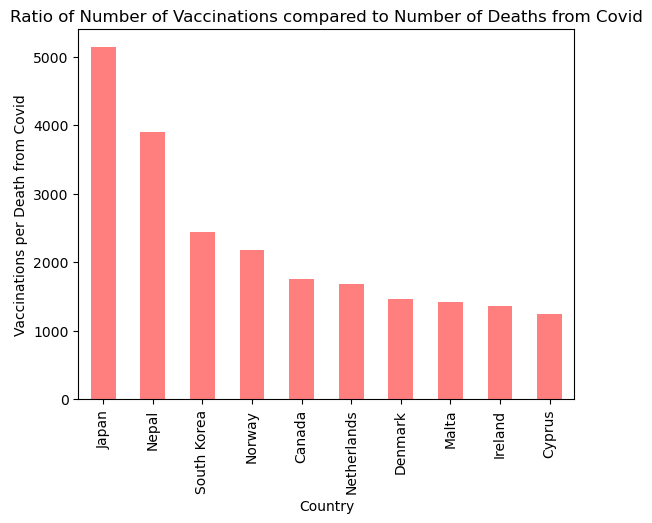

In [246]:
vax_death_plot = top_vaxdeath_ratio['Vaccinations:Deaths'].plot(kind='bar',title='Ratio of Number of Vaccinations compared to Number of Deaths from Covid', xlabel='Country',ylabel='Vaccinations per Death from Covid', color='red',alpha=0.5)

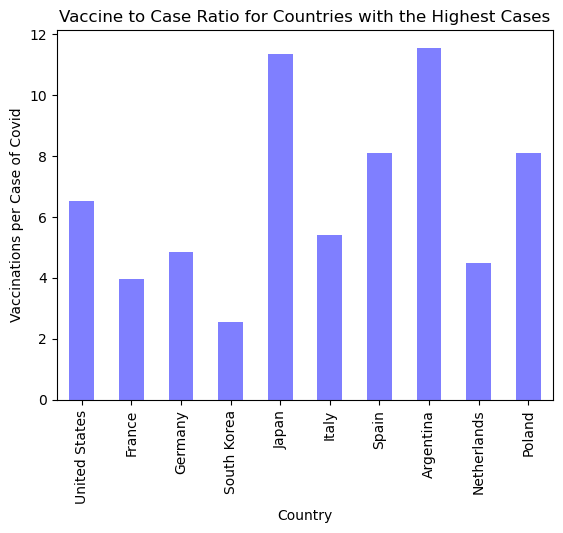

In [258]:
top_caseratio_chart = vax_case_ratio.nlargest(n=10,columns='Total Cases')
top_caseratio_chart = top_caseratio_chart['Vaccinations:Cases'].plot(kind='bar',color='blue',alpha=0.5,title='Vaccine to Case Ratio for Countries with the Highest Cases', xlabel='Country',ylabel='Vaccinations per Case of Covid')